(0.0, 6.0, 0.0, 20.0)

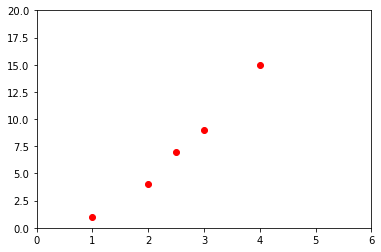

In [1]:
# Example of a data set with one feature and one label
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,2.5,3,4]
y = [1,4,7,9,15]
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])

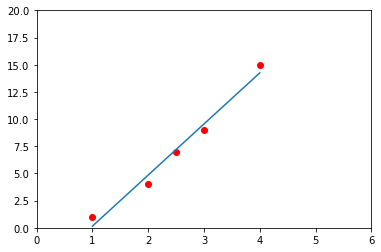

In [2]:
# line of best fit for the graph
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

# Line of best fit refers to a line through scatter plot  of data points that best expresses the 
# relationship between those points

# Setup and imports

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

Data

In [11]:
# load dataset

dftrain = pd.read_csv('train.csv') # training data
dfeval = pd.read_csv('eval.csv') # testing data

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [12]:
dftrain.head() # first 5 items in the dataframe

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [13]:
dftrain.describe() # statistical analysis of the data

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [14]:
dftrain.shape

(627, 9)

In [15]:
# lets look at survival information
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

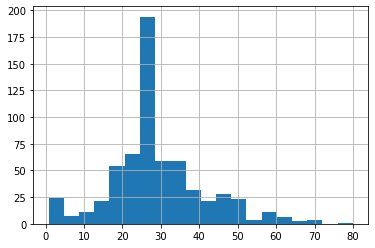

In [16]:
dftrain.age.hist(bins=20)

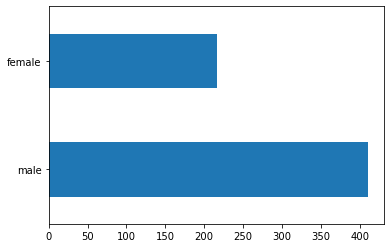

In [17]:
dftrain.sex.value_counts().plot(kind='barh')

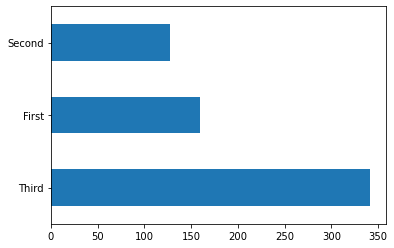

In [18]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

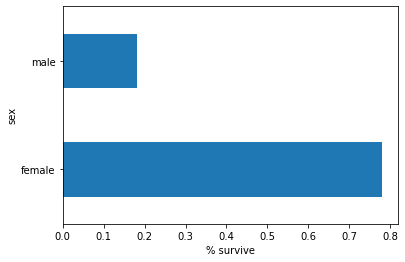

In [19]:
pd.concat([dftrain, y_train], axis =1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

# Training and Testing Data

In [20]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
# categorical data is the data that is non-numeric

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() # get a list  of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    # Here, our goal is to convert non-numeric data to numeric data.
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))
    
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [21]:
dftrain[feature_name].unique() # we get unique values for specific feature name

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [22]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function(): # inner function
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df))) # create tf.data.Dataset object with data and its label
        if shuffle:
            ds = ds.shuffle(1000) # randomize order of  data
        ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repest process for number of epochs
        return ds
    return input_function
train_input_fn = make_input_fn(dftrain, y_train) # calling the input function to get dataset
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [23]:
# Creating the Model

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# we create a linear estimator by poassing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Amrit\\AppData\\Local\\Temp\\tmpl3xtsv8_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
'''linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model matrices/stats by testing on testing data

clear_output()  # clears console output
print(result['accuracy']) # the result variable is simply a dict of stats about the model

'''

"linear_est.train(train_input_fn) # train\nresult = linear_est.evaluate(eval_input_fn) # get model matrices/stats by testing on testing data\n\nclear_output()  # clears console output\nprint(result['accuracy']) # the result variable is simply a dict of stats about the model\n\n"

In [25]:
# making predictions
result = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\Amrit\AppData\Local\Temp\tmpl3xtsv8_, running initialization to predict.
INFO:tensorflow:Calling model_fn.


C:\Users\Amrit\anaconda3\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [26]:
print(dfeval.loc[2])

sex                        female
age                            58
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object


In [27]:
print(result[2]['probabilities'][0])

0.5
